<a href="https://colab.research.google.com/github/HYEONJI-K/HJ_Python/blob/master/P0507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import nltk

In [18]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
f = open('/gdrive/MyDrive/2021 Data analysis and Machine Learning/0507/contents.txt', 'r',encoding = 'cp949')

lines = f.readlines()[0]
f.close()

lines[0:100]

'AI, 즉 인공지능을 통해 인간이 사회적으로 많은 도움이 되는 것을 제대로 인지할 수 있었습니다. 인공지능 로봇을 통해 인간의 한계로 닿지 못하거나, 인식할 수 없는 것들을 인공지'

In [19]:
tokenizer = RegexpTokenizer('[\w]+')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
words = lines.lower()
tokens = tokenizer.tokenize(words)
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
pd.Series(stopped_tokens2).value_counts().head(20)

인공지능이    67
인간의      51
있는       40
통해       40
많은       34
인공지능     32
인공지능의    29
인간이      29
것을       28
영상을      28
인공지능은    25
생각을      24
생각이      23
하지만      21
로봇이      20
되었습니다    20
있다는      19
보고       18
또한       17
하는       17
dtype: int64

In [4]:
!pip install konlpy
import konlpy
from konlpy.tag import Hannanum

     |████████████████████████████████| 19.4MB 2.0MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 460kB 29.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [21]:
hannanum = Hannanum()
f = open('/gdrive/MyDrive/2021 Data analysis and Machine Learning/0507/contents.txt', 'r',encoding = 'cp949')
lines = f.readlines()
f.close()
temp = []
for i in range(len(lines)):
    temp.append(hannanum.nouns(lines[i]))
def flatten(l): 
    flatList = [] 
    for elem in l: 
        if type(elem) == list: 
            for e in elem: 
                flatList.append(e) 
        else: 
            flatList.append(elem) 
    return flatList
word_list=flatten(temp)
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

인공지능    190
인간      130
생각      114
영상       56
로봇       49
우리       45
사람       42
발전       37
학습       29
부분       28
dtype: int64

In [25]:
from wordcloud import WordCloud
from collections import Counter
font_path = '/gdrive/MyDrive/2021 Data analysis and Machine Learning/0507/NanumBarunGothic.ttf'

In [26]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(stopped_tokens2)
wordcloud = wordcloud.generate_from_frequencies(count)

def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()
def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()

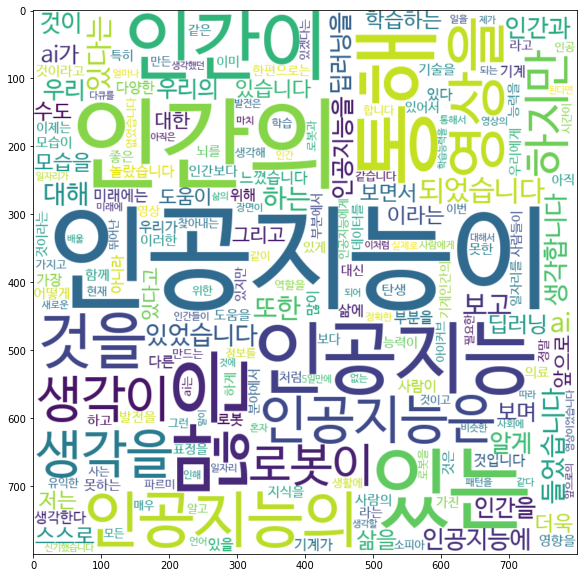

OSError: ignored

In [31]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud.png')

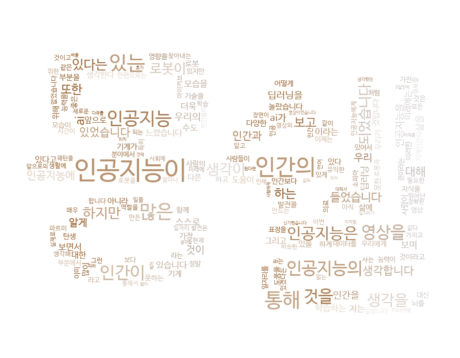

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import ImageColorGenerator

mong_mask=np.array(Image.open("/gdrive/MyDrive/2021 Data analysis and Machine Learning/0507/몽쉘.jpg"))
image_colors = ImageColorGenerator(mong_mask)

count = Counter(stopped_tokens2)
wc_mong = WordCloud(
    font_path = font_path,
    mask=mong_mask,
    background_color="white")
wc_mong = wc_mong.generate_from_frequencies(count)

plt.figure(figsize=(8,8))
plt.imshow(wc_mong.recolor(color_func=image_colors),interpolation="bilinear")
plt.axis("off")
plt.show()